In [157]:
# dacon에서 covid-PatientInfo, 환자 관련 자료 불러옴
covid_df = pd.read_csv("./covid(dacon)/PatientInfo.csv")
covid_df.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released
4003,7000000014,NaN,female,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,Itaewon Clubs,NaN,NaN,NaN,NaN,2020-05-09,NaN,NaN,isolated


In [158]:
# 각 컬럼 확인 : 확진 / 미확진 연관된 요소 여부 확인 -> 나이, 성별, 국가
covid_df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [159]:
# age컬럼에 's'를 지우고 싶어서 연령대 확인, nan 확인 
covid_df["age"].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '30', '100s'], dtype=object)

In [160]:
# nan을 다른 숫자로 바꾸고 싶었으나 방법 못찾고 우선 삭제하기로 결정
covid_df.dropna(subset=["age"], inplace=True)

In [161]:
covid_df["age"].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', '30', '100s'], dtype=object)

In [196]:
# 성별, 나이, 국가로만 따로 컬럼 생성 "covid_1"
colums=["sex", "age", "country"]
covid_1 = covid_df[colums]

In [208]:
covid_1.tail()

,sex,age,country
3999,female,20s,Korea
4000,male,30s,Korea
4001,female,20s,Korea
4002,female,10s,China
4003,female,30s,Korea


In [198]:
# age 컬럼의 's' 지우는 과정

In [207]:
age_str = list(covid_1["age"])
age_str[:10]

['50s', '30s', '50s', '20s', '20s', '50s', '20s', '20s', '30s', '60s']

In [172]:
len(age_str)

3525

In [177]:
# age의 unique값 확인해서 딕셔너리로 지정 
ages = {0:["0s"],
        10:["10s"],
        20:["20s"],
        30:["30s","30"],
        40:["40s"],
        50:["50s"],
        60:["60s"],
        70:["70s"],
        80:["80s"],
        90:["90s"],
        100:["100s"],
       }

In [178]:
# 튜플 형태로 바꿔줌
ages.items()

dict_items([(0, ['0s']), (10, ['10s']), (20, ['20s']), (30, ['30s', '30']), (40, ['40s']), (50, ['50s']), (60, ['60s']), (70, ['70s']), (80, ['80s']), (90, ['90s']), (100, ['100s'])])

In [206]:
age_int = []

for data in age_str:
    for ages_int, ages_str in ages.items():
        if data in ages_str:
            age_int.append(ages_int)
            
age_int[:10]

[50, 30, 50, 20, 20, 50, 20, 20, 30, 60]

In [180]:
# 기존 age와 컬럼수 동일한지 확인 
len(age_int)

3525

In [181]:
# 's' 사라진 age를 다시 컬럼에 추가
covid_1["ages"] = age_int
covid_1

c:\users\82106\anaconda3\envs\fc14th\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sex,age,country,ages
0,male,50s,Korea,50
1,male,30s,Korea,30
2,male,50s,Korea,50
3,male,20s,Korea,20
4,female,20s,Korea,20
...,...,...,...,...
3999,female,20s,Korea,20
4000,male,30s,Korea,30
4001,female,20s,Korea,20
4002,female,10s,China,10


In [182]:
# 's'가 있던 age 컬럼 삭제
covid_1 = covid_1.drop(columns="age")
covid_1

,sex,country,ages
0,male,Korea,50
1,male,Korea,30
2,male,Korea,50
3,male,Korea,20
4,female,Korea,20
...,...,...,...
3999,female,Korea,20
4000,male,Korea,30
4001,female,Korea,20
4002,female,China,10


In [205]:
# 확진자 / 비확진자 를 1 / 0 으로 분류
covid_y = covid_df["state"] = [1 if data=="isolated" else 0 for data in covid_df["state"] ] 
covid_y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [184]:
# 성별을 각 컬럼으로 나눠서 표기
onehot_sex = pd.get_dummies(covid_1["sex"])

covid_1.drop(columns=["sex"], inplace=True)
covid_1 = pd.concat([covid_1, onehot_sex], axis=1)
covid_1.tail()

,country,ages,female,male
3999,Korea,20,1,0
4000,Korea,30,0,1
4001,Korea,20,1,0
4002,China,10,1,0
4003,Korea,30,1,0


In [186]:
# country 컬럼의 나라들 확인
covid_1["country"].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'Switzerland', 'Germany', 'Indonesia', 'Vietnam', 'Foreign',
       'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'], dtype=object)

In [187]:
# 우리나라 사람들과 외국사람을 비교하고 싶어서 korea만 1 나머지 국가는 0
covid_1["country"] = [1 if data=="korea" else 0 for data in covid_1["country"] ] 
covid_1

,country,ages,female,male
0,0,50,0,1
1,0,30,0,1
2,0,50,0,1
3,0,20,0,1
4,0,20,1,0
...,...,...,...,...
3999,0,20,1,0
4000,0,30,0,1
4001,0,20,1,0
4002,0,10,1,0


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

X = covid_1
y = covid_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 13)

covid_1_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
covid_1_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

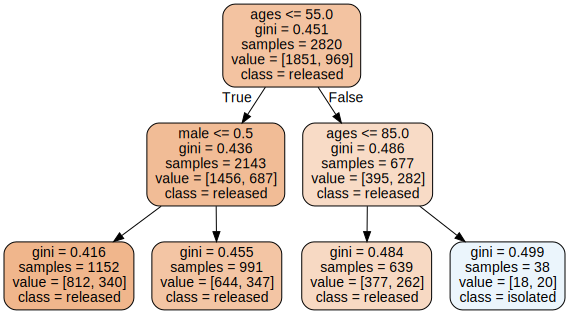

In [193]:
Source(export_graphviz(covid_1_tree, feature_names=X_train.columns,
                      class_names=["released", "isolated"],
                      rounded=True, filled=True))